# Clasificación multiclase

En este notebook realizaremos una clasificación multiclase con un dataset muy conocido: Iris.

## Usaremos el clasificador SVM.

In [1]:
# importamos librerias
import pandas as pd
import numpy as np
from sklearn import svm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargamos datos
from sklearn import datasets
iris = datasets.load_iris()

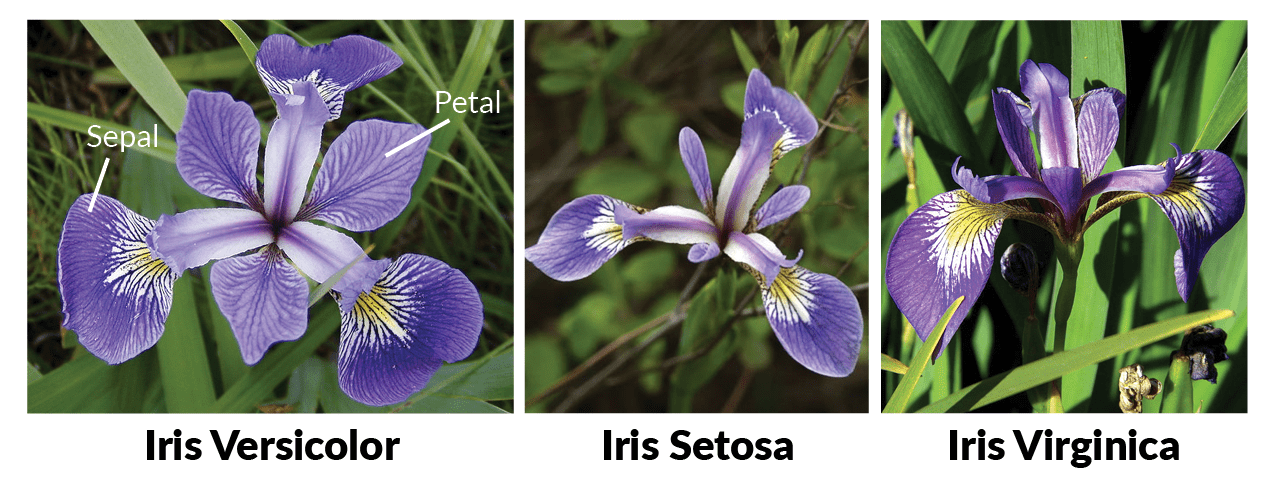

In [5]:
# Lo vemos como dataframe para mejor visualización
pd.DataFrame(iris.data)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# vemos la variable de la clase (target). observamos que son 3 clases
pd.DataFrame(iris.target)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
# mostramos los nombres de las variables
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Separación de las clases
Como primer ejercicio, veremos como la SVM crea las separaciones de las clases

In [8]:
# Trabajamos con las 2 primeras variables. La variable Y es el target.
X = iris.data[:, :2]
y = iris.target

In [9]:
# Creamos un objeto de SVM. Importante es la parámetero "kernel"
model = svm.SVC(kernel='linear')

# entrenamos el algoritmo: SVM con kernel lineal
model = model.fit(X, y)

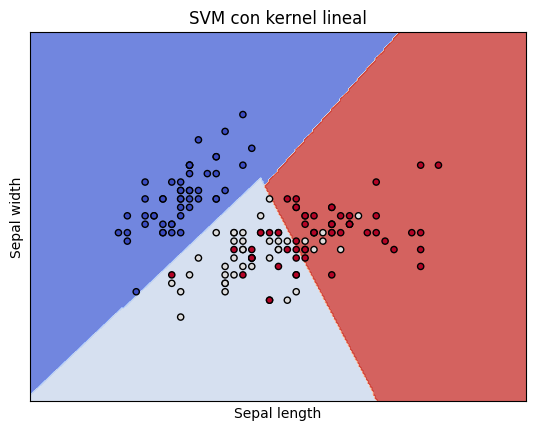

In [10]:
# Importamos la libreria matplolib
import matplotlib.pyplot as plt

# Función para crear una grilla de puntos
def make_meshgrid(x, y, h=.02):
    """creamos una malla de puntos para gráficar

    Parámetros
    ----------
    h: stepsize for meshgrid, opcional

    Retorna
    -------
    xx, yy : arreglos n-dimensionales
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Función para graficar los bordes encontrados por la SVM
def plot_contours(ax, clf, xx, yy, **params):
    """Gráfica los bordes de decisión del clasificador.

    Parámetros
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: diccionario de parametros para pasar a "contourf", opcional
    """
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Código principal
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Creamos una grilla de graficos pero de tamaño 1. Esto se puede usar de manera general
fig, ax = plt.subplots()

# Graficamos los bordes
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
# Graficamos los puntos
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Parámetros del gráfico
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM con kernel lineal')

plt.show()

## Cambio de kernel
Ahora repetiremos el proceso, pero cambiaremos el kernel de la SVM

In [11]:
# Creamos un objeto de SVM
#model = svm.SVC(kernel='poly', degree=7, gamma='auto', C=1)
model = svm.SVC(kernel='rbf', gamma='auto')

# entrenamos el algoritmo: SVM con kernel polinomial
model = model.fit(X, y)

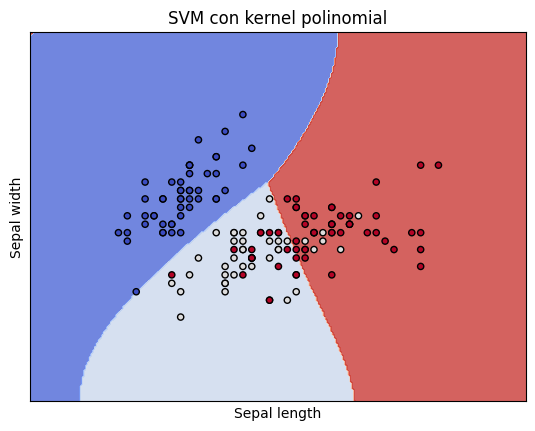

In [12]:
# Importamos la libreria matplolib
import matplotlib.pyplot as plt

# Función para crear una grilla de puntos
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Función para graficar los bordes encontrados por la SVM
def plot_contours(ax, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Código principal
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Creamos una grilla de graficos pero de tamaño 1. Esto se puede usar de manera general
fig, ax = plt.subplots()

# Graficamos los brodes
plot_contours(ax, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
# Graficamos los puntos
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Parámetros del gráfico
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM con kernel polinomial')

plt.show()

## Pruebe cambiando los parámetros de la SVM y observe lo que pasa.
Juegue 5 minutos. Revise la documentación y vea las opciones que existen.

# Clasificación.
Elija los parámetros que más les gusto para la SVM y utilícelos para esta sección del notebook.

In [13]:
# usaremos todas las variables
X = iris.data

In [14]:
# Importamos la función para dividir entre training set y testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=771)

In [15]:
model = svm.SVC(kernel='rbf', gamma='auto')

# Entrenamos el modelo
model.fit(X_train, y_train)

SVC(gamma='auto')

In [16]:
# Hacemos al predicción con los datos de test
X_predicted = model.predict(X_test)

In [17]:
# importamos las funciones para calcular la matriz de confusión y el reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, X_predicted))

[[11  0  0]
 [ 0 13  0]
 [ 0  2 19]]


In [ ]:
print(classification_report(y_test, X_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.60      0.92      0.73        13
           2       0.93      0.62      0.74        21

    accuracy                           0.80        45
   macro avg       0.84      0.85      0.82        45
weighted avg       0.85      0.80      0.80        45



##¿Qué puede decir de los resultados?

##¿y las estrategias One vs rest y One vs One? ¿donde se usaron?

Revise la documentación nuevamente si es que no sabe. [ACA](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


#Responda la siguiente pregunta: ¿Cuál estrategia por defecto usa la función SVC()?

Acá también encontrará información. Se le invita a revisar este link de la documentación. [LINK](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)